In [1]:
pip install nltk

In [2]:
#Ejemplo básico de clasificador de textos utilizando el clasificador
#Naive Bayes de NLTK

# 1. Importación de bibliotecas

import nltk
import random
from nltk.corpus import movie_reviews
# Descargar el recurso 'punkt'
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
# 2. Definición del cojunto de datos etiquetados

# Datos adaptados de: https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data
# Se filtró y tomó los datos 0 - negative y 4 - positive

import csv

# Ruta a tu archivo de etiquetas
Train_sentiment = 'Train_Sentiment.csv'

# Leer el archivo CSV y convertirlo en una lista de tuplas
data = []
try:
    with open(Train_sentiment, newline='', encoding='utf-8') as csvfile:
        # Usa DictReader con el delimitador correcto
        reader = csv.DictReader(csvfile, delimiter=';')
        for line_num, row in enumerate(reader, start=1):
            phrase = row.get('Phrase')
            sentiment = row.get('Sentiment')
            if phrase and sentiment:
                data.append((phrase, sentiment))
            else:
                print(f"Advertencia: Línea incorrecta en {line_num}: {row}")
except FileNotFoundError as e:
    print("Error: El archivo no fue encontrado.", e)
except csv.Error as e:
    print("Error al leer el archivo CSV:", e)

# Mostrar las primeras filas de la lista de tuplas para verificar que se ha leído correctamente
for i in range(min(5, len(data))):
    print(data[i])

# Mostrar la cantidad total de datos leídos
print()
print(f"Cantidad total de datos leídos: {len(data)}")

('This quiet , introspective and entertaining independent is worth seeking .', 'positive')
('quiet , introspective and entertaining independent', 'positive')
('entertaining', 'positive')
('is worth seeking', 'positive')
('would have a hard time sitting through this one', 'negative')

Cantidad total de datos leídos: 18412


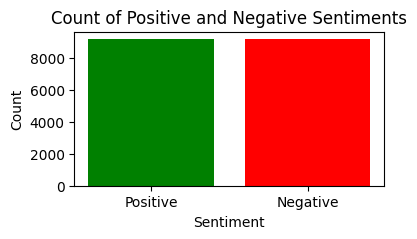

Positive count: 9206
Negative count: 9206


In [22]:
# Contar la cantidad de comentarios positivos y negativos

positive_count = sum(1 for _, label in data if label == "positive")
negative_count = sum(1 for _, label in data if label == "negative")

# Crear la gráfica
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.figure(figsize=(4, 2))  # Ancho 6 pulgadas, Alto 4 pulgadas
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Sentiments')
plt.show()
print("Positive count:",positive_count)
print("Negative count:",negative_count)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


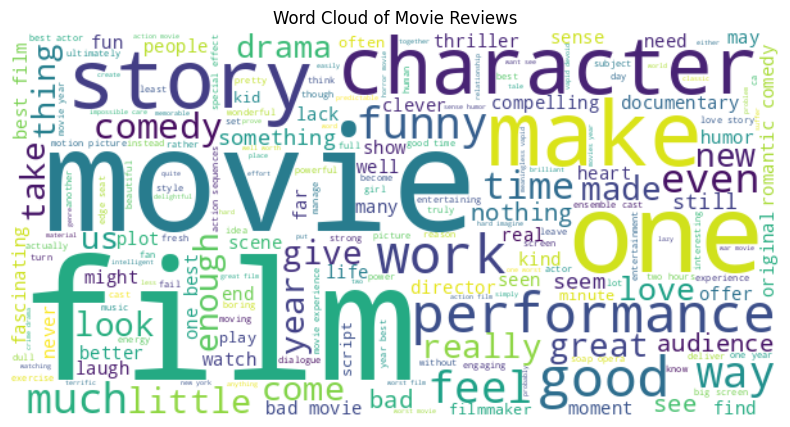

In [23]:
# Muertra la nube de palabras

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(all_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


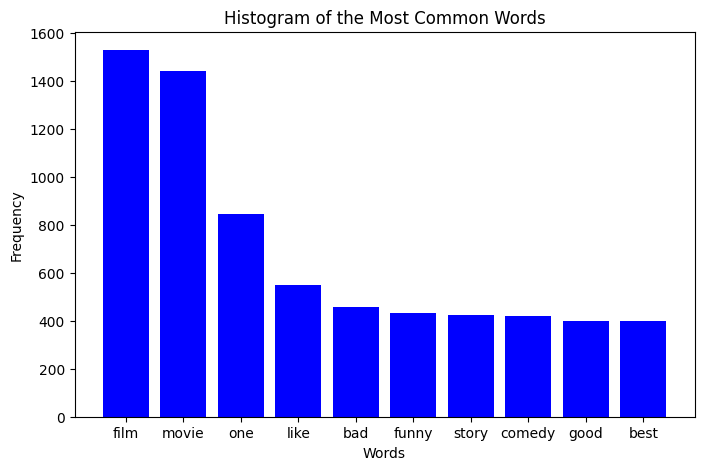

In [24]:
# Muestra el histograma de las palabras

import matplotlib.pyplot as plt
from collections import Counter

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
common_words = word_freq.most_common(10)

# Crear listas de palabras y sus frecuencias
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# Generar el histograma
plt.figure(figsize=(8, 5))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of the Most Common Words')
plt.show()

In [25]:
# 3. Preprocesamiento de datos

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Asegurando los recursos necesarios de NLTK descargados
nltk.download('punkt')
nltk.download('wordnet')

# Inicializa el lematizador
lemmatizer = WordNetLemmatizer()

# Preprocesamiento de datos: tokenización, lematización y extracción de características
def preprocess_data(text):
    preprocessed_data = []
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    return {word: True for word in lemmatized_tokens}



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# 4. Aplicación de preprocesamiento a los datos

# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess_data(text), label) for (text, label) in data]

In [27]:
# 5. División de datos
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

# Mostrar la cantidad de datos en cada conjunto
print(f"Cantidad de datos de entrenamiento: {len(train_set)}")
print(f"Cantidad de datos de prueba: {len(test_set)}")

Cantidad de datos de entrenamiento: 14729
Cantidad de datos de prueba: 3683


In [28]:
# 6. Entrenamiento del clasificador

#Entrenamos un clasificador utilizando Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [29]:
# 7. Evaluación del clasificador

#Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 0.9332066250339397


Puntaje F1: 0.93


<Figure size 400x200 with 0 Axes>

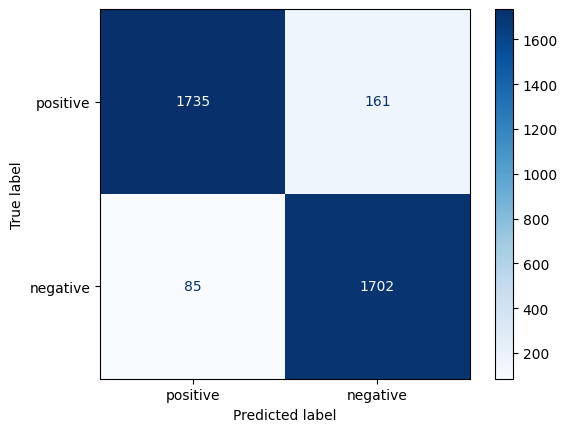

In [30]:
# Matriz de confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Obtener etiquetas verdaderas y predichas para la matriz de confusión
true_labels = [label for (features, label) in test_set]
predicted_labels = [classifier.classify(features) for (features, label) in test_set]

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "negative"])

# Calcular el puntaje F1
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Mostrar el puntaje F1
print(f"Puntaje F1: {f1:.2f}")

# Dibujar la matriz de confusión
plt.figure(figsize=(4, 2))  # Ajusta el tamaño del gráfico aquí
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

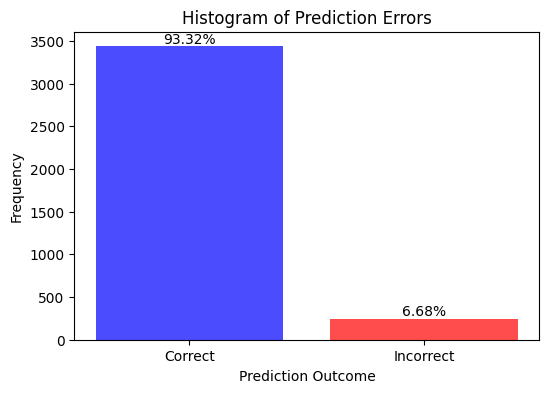

Correct count: 3437
Incorrect count: 246
Correct percentage: 93.32%
Incorrect percentage: 6.68%


In [31]:
# Calcular los errores
correct_count = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == predicted_label)
incorrect_count = len(true_labels) - correct_count

# Calcular los porcentajes
total_count = len(true_labels)
correct_percentage = (correct_count / total_count) * 100
incorrect_percentage = (incorrect_count / total_count) * 100

# Crear los datos para el histograma de errores
error_counts = [correct_count, incorrect_count]
error_labels = ['Correct', 'Incorrect']
error_percentages = [correct_percentage, incorrect_percentage]

# Crear el histograma de errores utilizando un bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(error_labels, error_counts, color=['blue', 'red'], alpha=0.7)
plt.xlabel('Prediction Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')

# Añadir los porcentajes encima de las barras
for bar, percentage in zip(bars, error_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

print("Correct count:", correct_count)
print("Incorrect count:", incorrect_count)
print(f"Correct percentage: {correct_percentage:.2f}%")
print(f"Incorrect percentage: {incorrect_percentage:.2f}%")

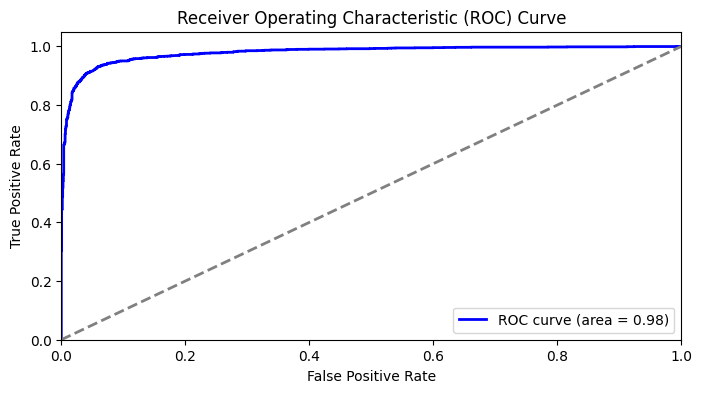

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc

# Obtener probabilidades predichas
true_labels_binary = [1 if label == 'positive' else 0 for label in true_labels]
predicted_probs = [classifier.prob_classify(features).prob('positive') for (features, label) in test_set]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(true_labels_binary, predicted_probs)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
# 8. Clasificación de un nuevo texto
#Clasificamos un nuevo texto

new_texts = [
    "This movie is amazing",
    #Adicionales negativas
    "a weak and ineffective ghost story without a conclusion or pay off",
    "without a conclusion or pay off", "negative",
    "thriller as lazy as it is interminable",
    "is the first film I 've ever seen that had no obvious directing involved",
    "There's nothing interesting in Unfaithful whatsoever",
    "There's already been too many of these film",
    "feels stitched together from stock situations and characters from other movies",
    "It shows that some studios firmly believe that people have lost the ability to think and will forgive any shoddy product as long as there's a little girl-on-girl action",
    "shoddy product",
    "yet not as hilariously raunchy as South Park , this strangely schizo cartoon seems suited neither to kids or adults",
    #Adicionales positivas
    "as hilariously raunchy as South Park",
    "this will be an enjoyable choice for younger kids",
    "is surprisingly brilliant",
    "Toback 's deranged immediacy makes it seem fresh again",
    "Stanley Kwan has directed not only one of the best gay love stories ever made",
    "Thanks to confident filmmaking and a pair of fascinating performances",
    "with a series of riveting set pieces",
    "A mesmerizing cinematic poem from the first frame to the last",
    "which is worth seeing",
    "enough freshness", "positive"
]

# Preprocesar y clasificar los nuevos textos
for new_text in new_texts:
    new_text_features = preprocess_data(new_text)
    predicted_label = classifier.classify(new_text_features)
    print(f"Text: {new_text} -> Predicted label: {predicted_label}")

Text: This movie is amazing -> Predicted label: positive
Text: a weak and ineffective ghost story without a conclusion or pay off -> Predicted label: negative
Text: without a conclusion or pay off -> Predicted label: negative
Text: negative -> Predicted label: negative
Text: thriller as lazy as it is interminable -> Predicted label: negative
Text: is the first film I 've ever seen that had no obvious directing involved -> Predicted label: negative
Text: There's nothing interesting in Unfaithful whatsoever -> Predicted label: negative
Text: There's already been too many of these film -> Predicted label: negative
Text: feels stitched together from stock situations and characters from other movies -> Predicted label: negative
Text: It shows that some studios firmly believe that people have lost the ability to think and will forgive any shoddy product as long as there's a little girl-on-girl action -> Predicted label: negative
Text: shoddy product -> Predicted label: negative
Text: yet not

In [35]:
# probando con textos negativos
new_texts = [
    "This film was a complete waste of time.",
    "The plot was predictable and boring.",
    "The performances were very mediocre.",
    "The script lacked originality and depth.",
    "The movie had too many clichés.",
    "I couldn't connect with any of the characters.",
    "The direction was weak and disorganized.",
    "The cinematography did not do justice to the story.",
    "The pacing was too slow and tedious.",
    "The ending was disappointing and senseless.",
    "The action scenes were confusing and poorly choreographed.",
    "The background music was irritating and out of place.",
    "The plot development was very poor.",
    "The special effects were of very low quality.",
    "The dialogue was flat and emotionless.",
    "The humor was not funny at all.",
    "The plot fell apart in the second half.",
    "The film tried to be profound but failed.",
    "The pacing of the movie was uneven and offbeat.",
    "The editing was chaotic and disorganized.",
    "The movie had too many unnecessary characters.",
    "The pace was so slow I fell asleep.",
    "The scenes dragged on without adding anything to the plot.",
    "The film lacked a clear direction.",
    "The villain was neither believable nor intimidating.",
    "The movie promised a lot and delivered very little.",
    "The performances were forced and unnatural.",
    "The character development was superficial.",
    "The story was a repetition of other films.",
    "The dialogue was full of clichés.",
    "The main plot got lost among boring subplots.",
    "The humor seemed out of place and forced.",
    "The movie failed to keep my interest at any point.",
    "The film was a major disappointment in every aspect.",
    "The narrative was confusing and disorganized.",
    "The dramatic moments were exaggerated and ineffective.",
    "The chemistry between the actors was non-existent.",
    "The film lacked tension and emotion.",
    "The movie tried to be epic but failed miserably.",
    "The key scenes were hard to follow.",
    "The pacing of the film felt torturous.",
    "The plot felt stagnant and directionless.",
    "The ending was abrupt and lacked proper resolution.",
    "The movie was full of mistakes and technical flaws.",
    "The characters were one-dimensional and predictable.",
    "The film had an incoherent narrative.",
    "The script was full of insipid dialogue.",
    "The film had no surprises or interesting twists.",
    "The setting was generic and unimaginative.",
    "The film failed to engage me with the story at all."
]


# Definir la etiqueta esperada
etiqueta_esperada = "negative"

# Inicializar el contador de aciertos
aciertos = 0

# Realizar la clasificación y contar los aciertos
for new_text in new_texts:
    new_text_features = preprocess_data(new_text)
    predicted_label = classifier.classify(new_text_features)

    # Comprobar si la predicción es correcta
    if predicted_label == etiqueta_esperada:
        aciertos += 1

    print(f"Text: {new_text} -> Predicted label: {predicted_label}")

# Calcular el porcentaje de aciertos
total_textos = len(new_texts)
porcentaje_aciertos = (aciertos / total_textos) * 100

print()
print(f"Porcentaje de aciertos: {porcentaje_aciertos:.2f}%")

Text: This film was a complete waste of time. -> Predicted label: negative
Text: The plot was predictable and boring. -> Predicted label: negative
Text: The performances were very mediocre. -> Predicted label: negative
Text: The script lacked originality and depth. -> Predicted label: negative
Text: The movie had too many clichés. -> Predicted label: negative
Text: I couldn't connect with any of the characters. -> Predicted label: negative
Text: The direction was weak and disorganized. -> Predicted label: negative
Text: The cinematography did not do justice to the story. -> Predicted label: negative
Text: The pacing was too slow and tedious. -> Predicted label: negative
Text: The ending was disappointing and senseless. -> Predicted label: negative
Text: The action scenes were confusing and poorly choreographed. -> Predicted label: negative
Text: The background music was irritating and out of place. -> Predicted label: negative
Text: The plot development was very poor. -> Predicted labe